Check the dependence of the target on the input features

In [12]:
import xarray as xr
import pandas as pd
import numpy as np

Some functions

In [2]:
def dataset_to_dataframe(directory, fn, time_slice=None):
    ds = xr.open_dataset(directory + fn)
    if time_slice is not None:
        ds = ds.isel(t=time_slice)
    df = ds.to_dataframe()
    return df

#### Load in data

In [4]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/SO_JET/coarsened_data/'
files = [
    'MINT_1d_0061-0072_eke_tendency_c_SO_JET.nc',
    'MINT_1d_0061-0072_vor_cg_SO_JET.nc',
    'MINT_1d_0061-0072_mke_c_SO_JET.nc',
    'MINT_1d_0061-0072_sa_c_SO_JET.nc',
    'MINT_1d_0061-0072_eke_c_SO_JET_shifted.nc'
    ]

In [6]:
from functools import reduce
dfs = [dataset_to_dataframe(directory, fn, time_slice=slice(1000,1001)) for fn in files]
df = reduce(lambda left, right: pd.merge(left, right), dfs)
df


,gphit,glamt,eke_tendency,vor,mke,sa,eke_shift
0,-47.422141,2.625,2.499683e-07,-1.158723e-05,0.078996,0.605863,0.096606
1,-47.422141,2.875,2.754347e-07,-7.774019e-06,0.143205,0.443063,0.075549
2,-47.422141,3.125,1.472008e-07,-1.999057e-07,0.137847,0.402802,0.040784
3,-47.422141,3.375,5.231507e-08,5.025423e-06,0.095292,0.419681,0.023357
4,-47.422141,3.625,-5.860709e-09,6.333770e-06,0.057951,0.436180,0.016744
...,...,...,...,...,...,...,...
3235,-37.693867,16.375,-1.768307e-08,3.063496e-06,0.007222,1.468812,0.019449
3236,-37.693867,16.625,-1.271694e-08,4.860463e-06,0.008948,1.491591,0.023048
3237,-37.693867,16.875,9.497796e-09,6.792784e-06,0.009973,1.533474,0.031508
3238,-37.693867,17.125,6.116962e-08,4.753235e-06,0.008293,1.489361,0.048020


In [15]:
df['eke_shift_log'] = np.log1p(df['eke_shift'].abs())
df['mke_log'] = np.log1p(df['mke'].abs())
df

,gphit,glamt,eke_tendency,vor,mke,sa,eke_shift,eke_shift_log,mke_log
0,-47.422141,2.625,2.499683e-07,-1.158723e-05,0.078996,0.605863,0.096606,0.092220,0.076031
1,-47.422141,2.875,2.754347e-07,-7.774019e-06,0.143205,0.443063,0.075549,0.072832,0.133836
2,-47.422141,3.125,1.472008e-07,-1.999057e-07,0.137847,0.402802,0.040784,0.039974,0.129137
3,-47.422141,3.375,5.231507e-08,5.025423e-06,0.095292,0.419681,0.023357,0.023089,0.091021
4,-47.422141,3.625,-5.860709e-09,6.333770e-06,0.057951,0.436180,0.016744,0.016605,0.056334
...,...,...,...,...,...,...,...,...,...
3235,-37.693867,16.375,-1.768307e-08,3.063496e-06,0.007222,1.468812,0.019449,0.019262,0.007196
3236,-37.693867,16.625,-1.271694e-08,4.860463e-06,0.008948,1.491591,0.023048,0.022787,0.008909
3237,-37.693867,16.875,9.497796e-09,6.792784e-06,0.009973,1.533474,0.031508,0.031021,0.009924
3238,-37.693867,17.125,6.116962e-08,4.753235e-06,0.008293,1.489361,0.048020,0.046902,0.008259


The above lambda does

```
    If dfs = [df1, df2, df3, df4], reduce() does:

    First iteration: pd.merge(df1, df2) → result is temp1
    Second iteration: pd.merge(temp1, df3) → result is temp2
    Third iteration: pd.merge(temp2, df4) → result is final_df
```

#### Plot data

<Axes: xlabel='vor', ylabel='eke_tendency'>

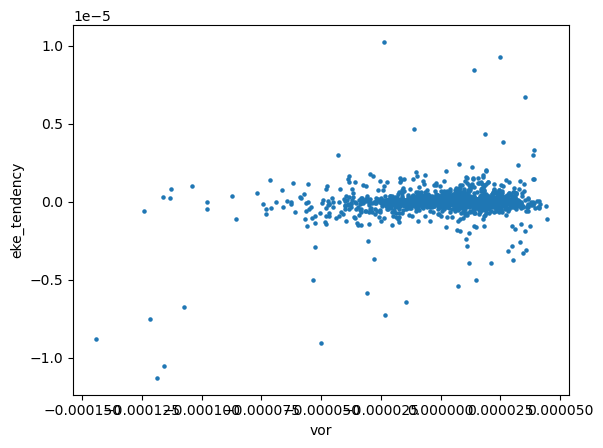

In [7]:
df.plot.scatter(
    x='vor', 
    y='eke_tendency',
    s=5)

<Axes: xlabel='sa', ylabel='eke_tendency'>

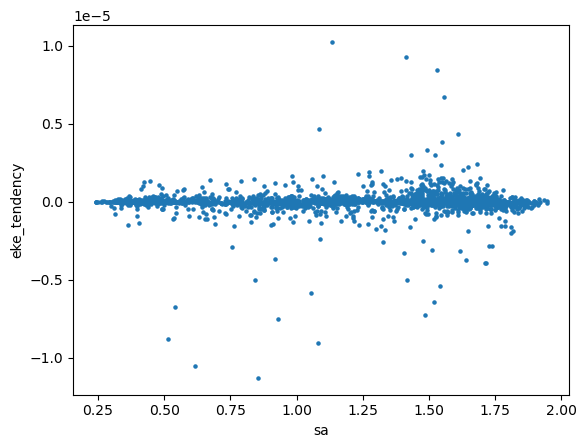

In [8]:
df.plot.scatter(
    x='sa', 
    y='eke_tendency',
    s=5)

<Axes: xlabel='mke_log', ylabel='eke_tendency'>

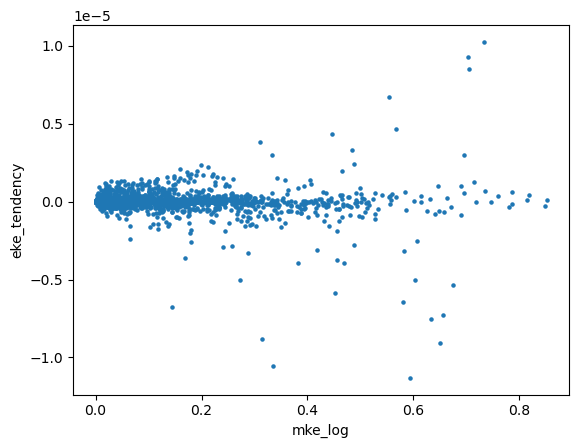

In [20]:
df.plot.scatter(
    x='mke_log', 
    y='eke_tendency',
    s=5)

<Axes: xlabel='eke_shift_log', ylabel='eke_tendency'>

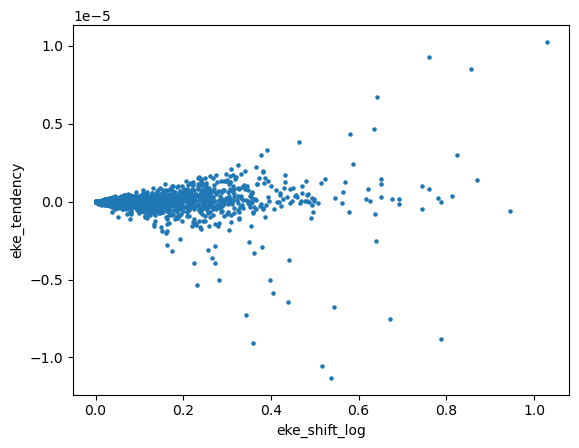

In [19]:
df.plot.scatter(
    x='eke_shift_log', 
    y='eke_tendency',
    s=5)

<Axes: xlabel='eke_shift_log', ylabel='vor'>

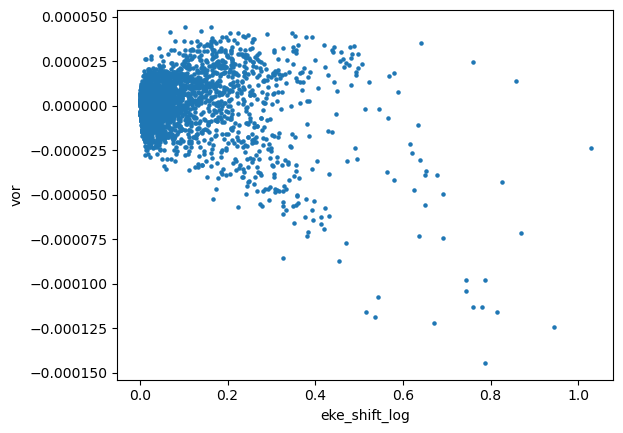

In [16]:
df.plot.scatter(
    x='eke_shift_log', 
    y='vor',
    s=5)

<Axes: xlabel='eke_shift_log', ylabel='mke_log'>

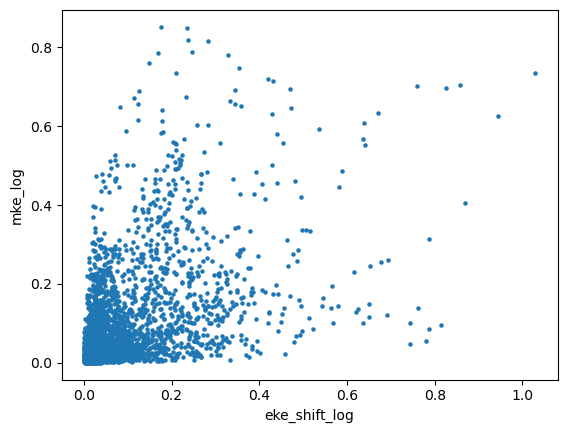

In [21]:
df.plot.scatter(
    x='eke_shift_log', 
    y='mke_log',
    s=5)

#### Mutual information

In [5]:
dfs = [dataset_to_dataframe(directory, fn, time_slice=slice(1000,1001)) for fn in files]
df = reduce(lambda left, right: pd.merge(left, right), dfs)
df

NameError: name 'reduce' is not defined

In [7]:
from sklearn.feature_selection import mutual_info_regression
X = df[['vor', 'sa', 'mke', 'eke_shift']]
y = df['eke_tendency']
mi = mutual_info_regression(X, y)

In [8]:
mi

array([0.1430149 , 0.17960466, 0.24464946, 0.55334593])